# Verification of bias in the calculation of Variance for Gaussian Distribution

For a dataset of n sample of random variable x, denoted by X = [x1, x2, ... xn], each independently sampled from the normal distribution with mean µ and variance $\sigma^2$.

We can estimate from the dataset with the respective formula:

$$µ = \frac{x1 + x2 + ... + xN}{N}$$

$$\sigma^2 = \frac{\sum_{n=1}^{N}{(xn - µ)}}{N}$$

While, the mean we predict tends to be unbiased, the variance is biased. The bias in variance seems to be dependent on the dataset size.

To predict the true variance, we need to scale the variance we got by the following factor.

$$\text{Scale factor (k)} = \frac{N}{N-1}$$

$$\text{True variance = k * sample variance}$$

This is the claim, I want to verify in this notebook.

Todo:
- [x] Generate many datasets of different sizes.
- [x] Calculate variance for each cases.
- [x] Take the mean for each size.
- [x] Compare it with n/(n-1) scaled variances

If you take a distributions with variances already 1, job becomes a lot easier.

Variance expectations for different dimensions:
[0.         0.48478624 0.6603822  0.757781   0.80141784 0.83573491
 0.85834764 0.87104727 0.88718865 0.89645915 0.89981506 0.91761609
 0.91644507 0.92754766 0.93475269 0.94293706 0.94451184 0.94333708
 0.95086532 0.9504245 ]
Mathematical inverse scale factors:
[0.         0.5        0.66666667 0.75       0.8        0.83333333
 0.85714286 0.875      0.88888889 0.9        0.90909091 0.91666667
 0.92307692 0.92857143 0.93333333 0.9375     0.94117647 0.94444444
 0.94736842 0.95      ]


Text(0.5, 1.0, 'Variance expectation vs Number of dimensions')

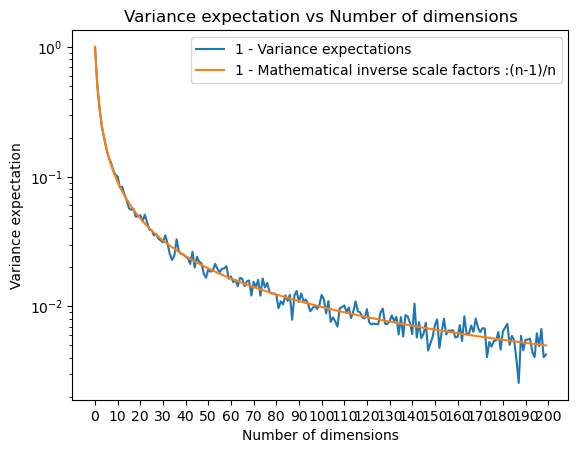

In [ ]:
import numpy as np 

variance_expectations = []

# checking up to 200 dimensions
dataset_size = 200
for i in range(1, dataset_size + 1):
    N_experiments = 10000 # Number of experiments for each size of dataset
    data = np.random.randn(N_experiments, i)
    means = (np.sum(data, axis=-1) / i).reshape(N_experiments, 1)

    # Calculate the variance for each experiment
    variances = np.einsum("ij->i", (data - means) ** 2) / i
    variance_expectations.append(np.mean(variances))
variance_expectations = np.array(variance_expectations)

print("Variance expectations for different dimensions:")
print(variance_expectations[:20])

# Calculate the scale factors n/(n-1) for each dataset size in reciprocal form.
mathematical_inverse_scale_factors = np.vectorize(lambda x: (x-1) / x)(np.arange(1, dataset_size + 1))
print("Mathematical inverse scale factors:")
print(mathematical_inverse_scale_factors[:20])

import matplotlib.pyplot as plt
# Subtracting from 1 before plotting so that values diminishing towards 1, actually diminishes towawrds 0.
plt.plot(1-variance_expectations, label="1 - Variance expectations")
plt.plot(1-mathematical_inverse_scale_factors, label="1 - Mathematical inverse scale factors :(n-1)/n")
plt.xlabel("Number of dimensions")
plt.ylabel("Variance expectation")

# Log scale allows us to see the diminishing effect more clearly
plt.yscale("log")
plt.legend()
plt.title("Variance expectation vs Number of dimensions")